# **Linear Regression**

In [45]:
import numpy as np

In [46]:
#visualise the data
import matplotlib.pyplot as plt

## Data Generate X, Y

In [47]:
#Genrating data

m = 100
X = np.random.randn(m)
X

array([ 0.31979468,  0.22787285,  0.25771441,  0.10411105, -1.07419581,
       -1.53814641, -0.06683213, -0.86546075, -0.72121713, -1.21252608,
       -0.68896102, -1.41654279,  1.12395267,  0.5271704 , -0.61453096,
        0.99784289,  0.81321518,  0.43391305, -0.07541616, -1.05082844,
        0.17779348,  0.61994373, -0.868228  , -0.14524232,  0.26381082,
        0.46850754,  0.17690945, -0.53513472, -0.89878952,  1.36442397,
       -0.57926626, -0.20071385, -0.52493644,  0.04435861, -0.2848443 ,
        1.50755071, -0.76866434, -1.33489926,  1.35031153, -0.4598666 ,
        1.07890287, -0.9651015 , -0.20589764,  0.60493271,  0.64582433,
       -0.09313072, -1.22743425, -0.26361813,  0.85145568, -0.87655292,
        0.04103162,  0.79716003,  1.21696159, -1.12271349,  1.78815529,
        1.02607589, -1.39007873, -0.37042938,  0.09211784,  1.13556064,
       -1.0009652 ,  0.4970453 ,  0.08578774, -1.72642571, -0.54851695,
        0.84813604, -1.28420939,  0.98008926, -0.08635863,  0.10

In [48]:
print(X.mean(), X.std())

-0.08938867003500292 0.8769337421319315


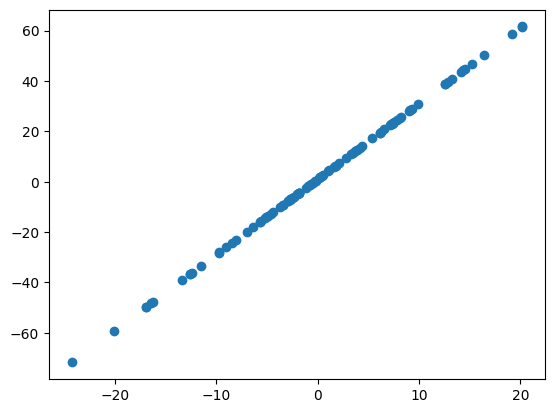

In [49]:
# IF i don't want the data to have STANDARD DEVIUATION as 1

X=np.random.randn(m)*10
X
Y=3*X + 1 #perfect Linear function

plt.scatter(X,Y)
plt.show()

In [50]:
print(X.mean(), X.std())

0.610642126104473 8.905450427842695


In [51]:
Y.shape

(100,)

In [52]:
X.shape


(100,)

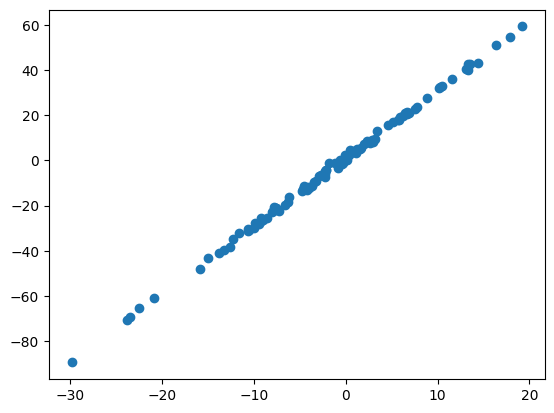

In [53]:
X=np.random.randn(m)*10
noise=np.random.randn(m)
X
Y=3*X + 1 + noise

plt.scatter(X,Y)
plt.show()

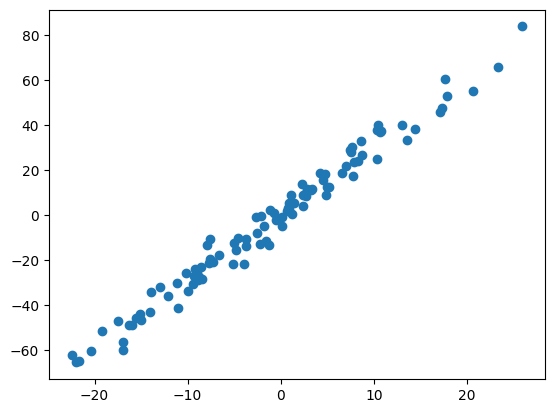

In [54]:
 # Increasing Noise
X=np.random.randn(m)*10
noise=np.random.randn(m)
X
Y=3*X + 1 + 5*noise

plt.scatter(X,Y)
plt.show()

In [55]:

def generateDataset(m):
  X=np.random.randn(m)*10
  noise=np.random.randn(m)
  y=3*X + 1 + 5*noise
  return X,y

In [56]:
X,y = generateDataset(100)

In [57]:
print(X.shape, y.shape)

(100,) (100,)


In [58]:
def plotData(X,y, color="orange", title="Data"):
  plt.title(title)
  plt.scatter(X,y, c=color)
  plt.show()

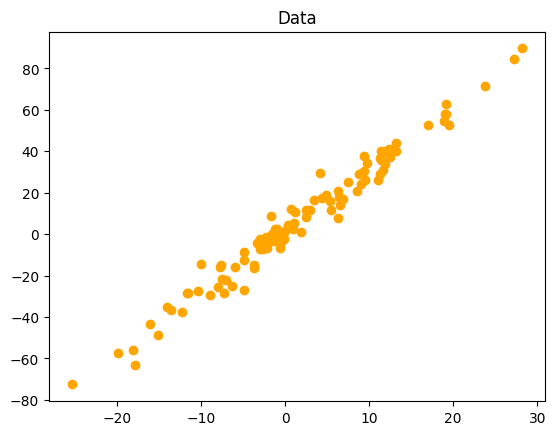

In [59]:
plotData(X,y)

## **Train & Test Split**

In [60]:


def traintestsplit(X, y, split = 0.8):
  #split is spliting factor in the given 0.8 means 80% & 20%
  m = X.shape[0]
  #create new matrix
  data = np.zeros((m, 2))
  data[:, 0] = X
  data[:, 1] = y

  #shuffling the data

  np.random.shuffle(data)

  split = int(m*split)
  # suppose m = 100 & split = 0.75
  # it will come out to be 75.0
  # it means 75 will go for training and rest 25 will go for testing

  X_train = data[:split, 0] # Row = 0 -->> 79
  #means pick all the rows upto split and 0th coloumn
  y_train = data[:split, 1] # Row = 0 -->> 79

  X_test = data[split:, 0]
  #means pick all the rows from split; that is Split value = 0.8 ; and 0th coloumn
  y_test = data[split:, 1]

  return X_train, y_train, X_test, y_test



In [61]:
X_train, y_train, X_test, y_test = traintestsplit(X, y)

In [63]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80,) (80,)
(20,) (20,)


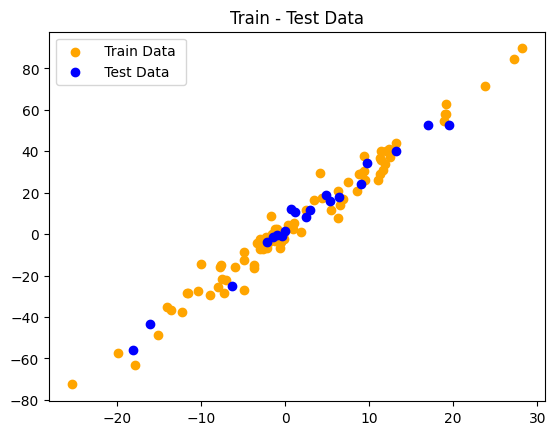

In [64]:
plt.scatter(X_train, y_train, color='orange', label = " Train Data ")
plt.scatter(X_test, y_test, color='blue', label = " Test Data")
plt.title("Train - Test Data")
plt.legend() # This function here shows Label name
plt.show()

## **Modelling of the Data**

In [65]:
# Hypothesis Function

def hypothesis(X, theta):
#assume theta is vector theta = [ theta (0) theta(1) ]
#Y = C + BX equation of line
# h(x) = 	θ0 +	θ1x

 return theta[0] + theta[1]*X

# ERROR Function

def error(X, y, theta):
  m = X.shape[0]
  e = 0 # error is 0
  for i in range(m):
    y_i = hypothesis(X[i], theta) # Error formula
    e  = e + (y[i] - y_i)**2

  return e/(2*m)


In [66]:
def gradient(X, y, theta):
  m = X.shape[0]
  grad = np.zeros((2, ))

  for i in range(m):
    exp = hypothesis(X[i], theta) - y[i]
    #exp is coimmon to both theta[0] && theta[1]
    grad[0] += (exp)
    grad[1] += (exp)*X[i]

  return grad / m


  # We need to train our model so we use Loop

def train(X, y, learning_Rate = 0.01,  maxIters = 150):
  theta = np.zeros((2, ))


  error_List = [ ]
  for i in range(maxIters):
    grad = gradient(X, y, theta)
    error_List.append(error(X,y, theta))
    theta[0] = theta[0] - learning_Rate * grad[0]
    theta[1] = theta[1] - learning_Rate * grad[1]

  plt.xlabel("Iterations Number")
  plt.ylabel("Loss")
  plt.plot(error_List)
  return theta

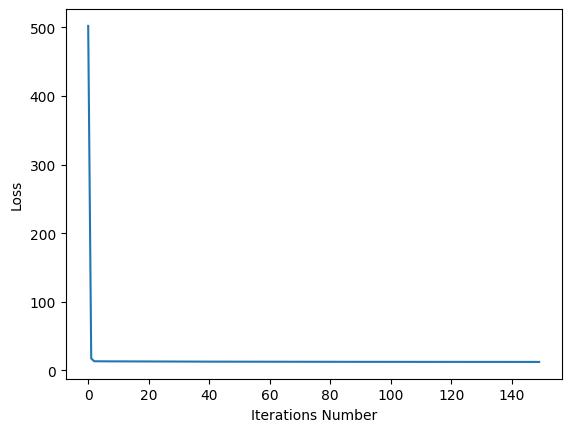

In [67]:
theta = train(X, y)
#What is the best fit line denoted by theta

## **Predictions**

For a new unseen Value what model will predict......

In [68]:
theta

array([1.16170951, 2.97522139])

We are using Normalised Data, Original was changed to Normal form in Above.


In [69]:
# I want to generate the predictions and get the line.

def predict(X, theta): # This is hypothesis
  return hypothesis(X, theta)  # SIMILAR TO ::-->> return theta[0] + theta[1]*X

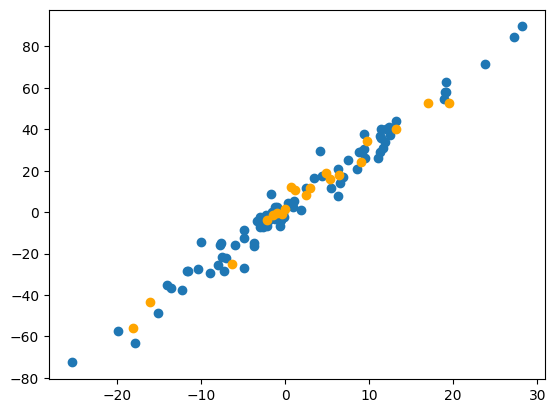

In [70]:
# See What line we are going to get

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color = 'orange')
plt.show()

In [71]:
y_pred = predict(X_test, theta)

In [72]:
y_pred.shape

(20,)

In [73]:
X_test.shape

(20,)

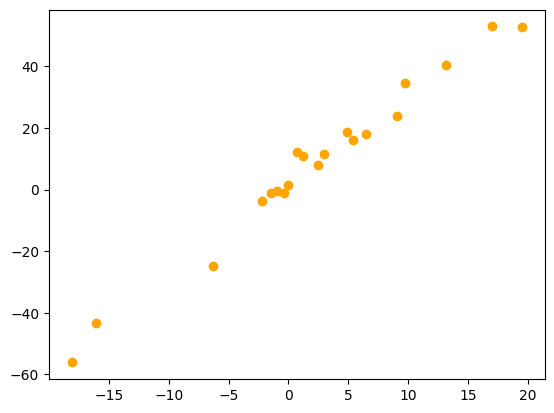

In [74]:
# Plotting Prediuctions.

#plottting X_test & y_test data

plt.scatter(X_test, y_test, color ='orange')
plt.show()

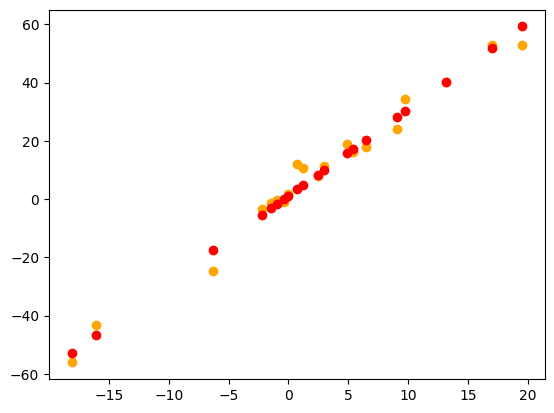

In [75]:
# Now plotting Predicted values too..

plt.scatter(X_test, y_test, color ='orange')
#predicted one values
plt.scatter(X_test, y_pred, color = 'red')
plt.show()

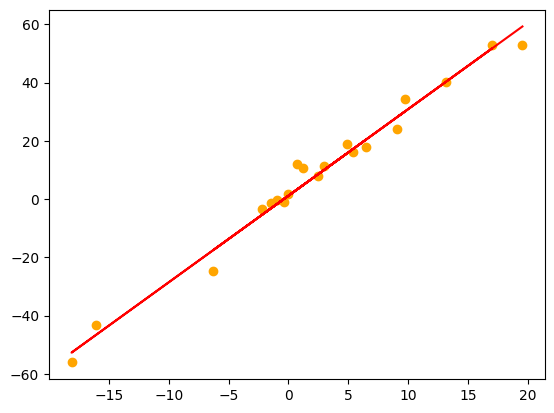

In [76]:
# If you want to plot graph in the form of line

# Now plotting Predicted values too..

plt.scatter(X_test, y_test, color ='orange')
#predicted one values
plt.plot(X_test, y_pred, color = 'red')
plt.show()

**The above Red Line represents Y-pred Predicted values**

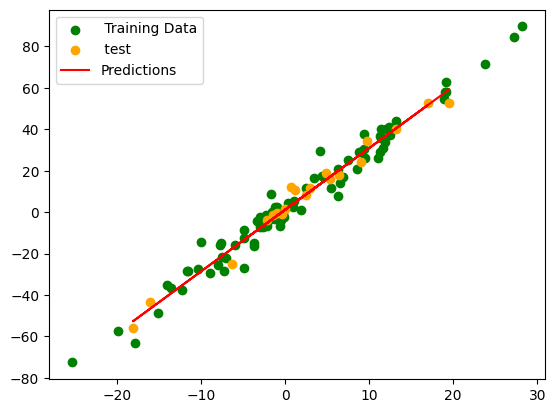

In [77]:
# NOW PLOTTING TRAINING DATA AS WELL

plt.scatter(X_train, y_train, color = 'green', label = ' Training Data')    #Training Data

plt.scatter(X_test, y_test, color ='orange', label = ' test')
#predicted one values
plt.plot(X_test, y_pred, color = 'red', label='Predictions')
plt.legend()
plt.show()

## **To find how Good or Bad line is**

**We use R^2**

### **Model_Evaluation**

In [78]:
# R2 Score

def r2score(y, y_pred):
 #formula of R2 score
 #For y_mean --
 y_mean = y.mean( )
 numerator = np.sum((y- y_pred)**2)
 denominator = np.sum((y- y_mean)**2)  # These operations are easily operated in Numpy

 R2 = 1 - (numerator / denominator)
 return R2

In [79]:
calc_r2 = r2score(y_test, y_pred)
print(calc_r2)

0.9793868434777259


**We See in above R2 lies in between [0, 1]**

Close to 1 it is./

**It is 96% better than what you will predict by making a average prediction**

## **Visualization**

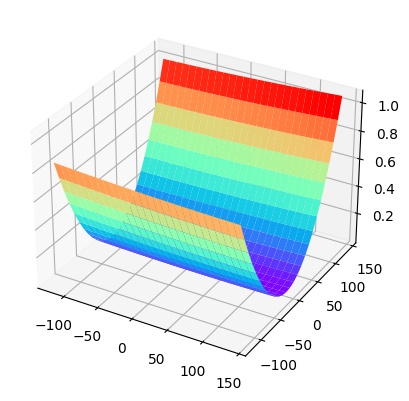

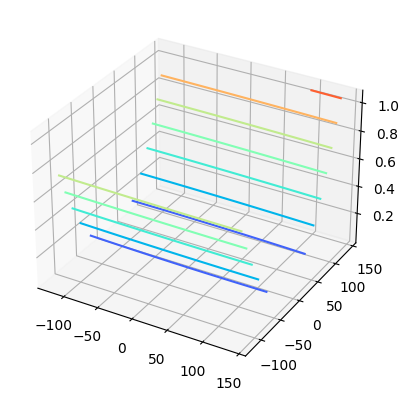

In [82]:
# Visualizing the training process

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing the 3D plotting toolkit

theta_0 = np.arange(-120, 150, 10)
theta_1 = np.arange(-120, 150, 10)
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
# will CreTE MESH & GRID IN BETWEEN

J = np.zeros(theta_0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_pred = theta_1[i, j] * X + theta_0[i, j]
        J[i, j] = np.mean((y - y_pred) ** 2) / 2

# 3D Surface Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

"""
This is a comment

ax = fig.add_subplot(111, projection='3d')

It looks like you are creating a 3D subplot using add_subplot with projection='3d'.
This is a common way to set up a 3D subplot in Matplotlib.

Here's a brief explanation of this line:

fig: The variable representing the figure. You usually create a figure first using plt.figure().

add_subplot(111, projection='3d'): This creates a subplot within the figure.
The arguments 111 refer to the number of rows, number of columns, and the plot number.
In this case, 111 means one row, one column, and it's the first plot. The projection='3d' argument
specifies that this subplot should be a 3D plot.

So, this line of code is creating a 3D subplot in your figure, and then you use this subplot (ax)
to create the 3D surface plot with ax.plot_surface(theta_0, theta_1, J, cmap='rainbow').
"""

ax.plot_surface(theta_0, theta_1, J, cmap='rainbow')
plt.show()

# Contour Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour(theta_0, theta_1, J, cmap='rainbow')
plt.show()


**Blue Region** --> Denotes Lower Loss


**RED region** --> Denotes Higher Loss

## **TRAJECTORY**

In [99]:
# Trace the trajectory of Gradient

def train(X, y, learning_Rate = 0.01,  maxIters = 150):
  theta = np.zeros((2, ))


  error_List = [ ]
  #Note down values of theta --> How my theta was changing during training process
  theta_list = [ ]

  for i in range(maxIters):
    grad = gradient(X, y, theta)
    error_List.append(error(X,y, theta))
    theta[0] = theta[0] - learning_Rate * grad[0]
    theta[1] = theta[1] - learning_Rate * grad[1]

  plt.xlabel("Iterations Number")
  plt.ylabel("Loss")
  plt.plot(error_List)
  return theta, theta_list, error_List

In [103]:
#Converting list into array

theta_list = np.array(theta_list)

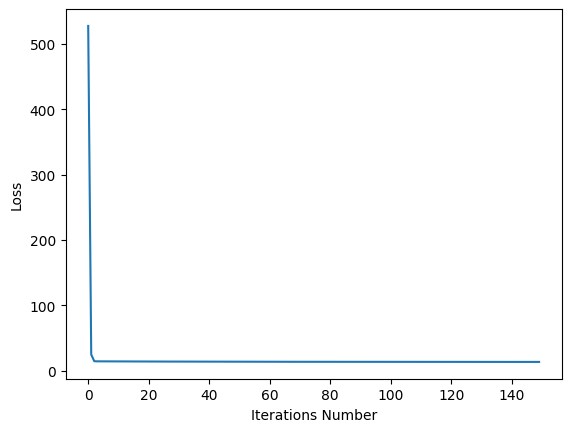

In [104]:
theta, theta_list, error_List = train(X_train, y_train)

IndexError: ignored

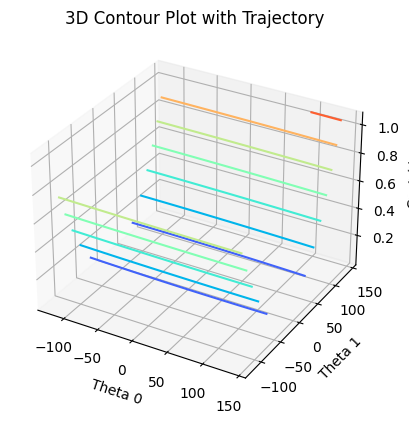

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have theta_list and error_List from your training function
theta_list = np.array(theta_list)

# Contour Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create 3D contour plot
contour_plot = ax.contour(theta_0, theta_1, J, cmap='rainbow')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost (J)')
ax.set_title('3D Contour Plot with Trajectory')

# Convert error_List to a NumPy array
error_List = np.array(error_List)

# Scatter plot for the trajectory
ax.scatter(theta_list[:, 0], theta_list[:, 1], error_List, color='red', label='Trajectory')

plt.legend()
plt.show()


## **We Are Changing Values of Theta**

In [107]:
# Trace the trajectory of Gradient
# Here we are changing the initialization

def train(X, y, learning_Rate = 0.01,  maxIters = 150):
  theta = np.array([-150, 100]) # Over here


  error_List = [ ]
  #Note down values of theta --> How my theta was changing during training process
  theta_list = [ ]

  for i in range(maxIters):
    grad = gradient(X, y, theta)
    error_List.append(error(X,y, theta))
    theta[0] = theta[0] - learning_Rate * grad[0]
    theta[1] = theta[1] - learning_Rate * grad[1]

  plt.xlabel("Iterations Number")
  plt.ylabel("Loss")
  plt.plot(error_List)
  return theta, theta_list, error_List

In [108]:
#Converting list into aray

theta_list = np.array(theta_list)

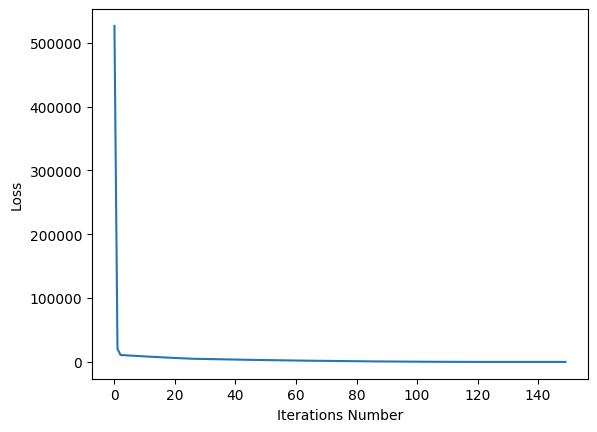

In [109]:
theta, theta_list, error_List = train(X_train, y_train)

IndexError: ignored

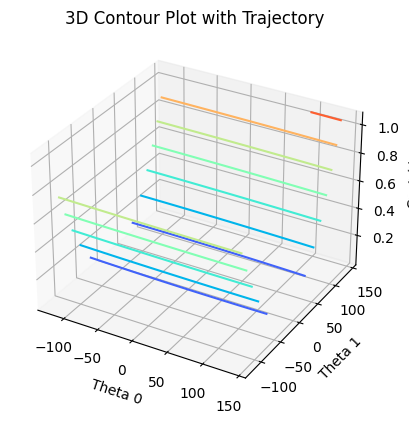

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have theta_list and error_List from your training function
theta_list = np.array(theta_list)

# Reshape theta_list to be a 2D array if it's not already
if theta_list.ndim == 1:
    theta_list = theta_list.reshape(-1, 1)

# Contour Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create 3D contour plot
contour_plot = ax.contour(theta_0, theta_1, J, cmap='rainbow')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost (J)')
ax.set_title('3D Contour Plot with Trajectory')

# Convert error_List to a NumPy array
error_List = np.array(error_List)

# Scatter plot for the trajectory
ax.scatter(theta_list[:, 0], theta_list[:, 1], error_List, color='red', label='Trajectory')

plt.legend()
plt.show()
